In [1]:
import pandas as pd
import numpy as np

In [2]:
zip_to_fips = pd.read_csv(r'C:\Users\zhang\Box\Air permit\ZIP_COUNTY_032020.csv')
region_1 = pd.read_excel(r'C:\Users\zhang\Box\Air permit\Region_1.xlsx')

In [4]:
zip_to_fips = zip_to_fips.rename(columns={'COUNTY':'FIPS'}).drop(
    columns=['RES_RATIO','BUS_RATIO','OTH_RATIO','TOT_RATIO'])

zip_to_fips['FIPS'] = zip_to_fips.FIPS.astype(str).str[:5].str.zfill(5)
zip_to_fips['ZIP'] = zip_to_fips.ZIP.astype(str).str[:5].str.zfill(5)

In [5]:
region_1_zipnotnull = region_1[region_1['ZIP'].notnull()]
region_1_zipisnull = region_1[region_1['ZIP'].isnull()]
region_1_zipnotnull['ZIP'] = region_1_zipnotnull.ZIP.astype(int)
region_1_zipnotnull['ZIP'] = region_1_zipnotnull.ZIP.astype(str).str[:5].str.zfill(5)
region_1_fips_1 = region_1_zipnotnull.merge(zip_to_fips,how="inner",on=['ZIP'])

C:\Users\zhang\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zhang\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
region_1_fips_1.columns

Index(['FACILITY_NAME', 'NAICS', 'ZIP', 'FIPS_x', 'REPORTING_YEAR',
       'UNIT_NAME', 'FUEL_TYPE', 'FUEL_QUANTITY', 'FUEL_QUANTITY_UOM',
       'Input_Capacity', 'Unit', 'FIPS_y'],
      dtype='object')

In [7]:
region_1_fips_1 = region_1_fips_1.rename(columns = {'FIPS_y': 'FIPS'}).drop(columns=['FIPS_x'])
region_1_fips = pd.concat([region_1_zipisnull, region_1_fips_1])

In [8]:
max_value = region_1_fips['Input_Capacity'].max()
min_value = region_1_fips['Input_Capacity'].min()
print(max_value, min_value)

249.0 0.63


Text(0, 0.5, 'Number of boilers')

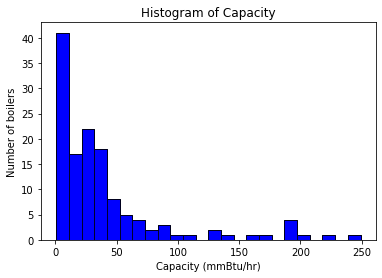

In [9]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(region_1_fips['Input_Capacity'], color = 'blue', edgecolor = 'black',
         bins = int((max_value - min_value)/10))

# seaborn histogram
sns.distplot(region_1_fips['Input_Capacity'], hist=True, kde=False, 
             bins=int((max_value - min_value)/10), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Capacity')
plt.xlabel('Capacity (mmBtu/hr)')
plt.ylabel('Number of boilers')

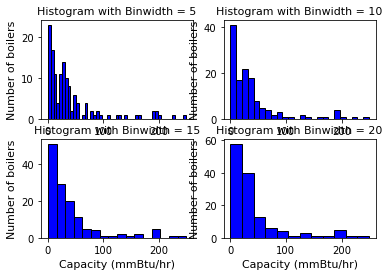

In [10]:
# Show 4 different binwidths
for i, binwidth in enumerate([5, 10, 15,20]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(region_1_fips['Input_Capacity'], bins = int((max_value - min_value)/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 11)
    ax.set_xlabel('Capacity (mmBtu/hr)', size = 11)
    ax.set_ylabel('Number of boilers', size= 11)

plt.show()

In [11]:
# plot capacity population in different industries
region_1_fips['NAICS'] = region_1_fips['NAICS'].astype(int)
region_1_fips['NAICS'] = region_1_fips['NAICS'].astype(str).str[:3]
print (region_1_fips['NAICS'].unique())

['336' '323' '325' '311' '331' '326' '322' '332' '339' '313' '327' '312'
 '337']


In [13]:
region_1_311 = region_1_fips[region_1_fips['NAICS'].str.startswith('311')]
region_1_312 = region_1_fips[region_1_fips['NAICS'].str.startswith('312')]
region_1_313 = region_1_fips[region_1_fips['NAICS'].str.startswith('313')]
region_1_314 = region_1_fips[region_1_fips['NAICS'].str.startswith('314')]
region_1_316 = region_1_fips[region_1_fips['NAICS'].str.startswith('316')]
region_1_321 = region_1_fips[region_1_fips['NAICS'].str.startswith('321')]
region_1_322 = region_1_fips[region_1_fips['NAICS'].str.startswith('322')]
region_1_323 = region_1_fips[region_1_fips['NAICS'].str.startswith('323')]
region_1_324 = region_1_fips[region_1_fips['NAICS'].str.startswith('324')]
region_1_325 = region_1_fips[region_1_fips['NAICS'].str.startswith('325')]
region_1_326 = region_1_fips[region_1_fips['NAICS'].str.startswith('326')]
region_1_327 = region_1_fips[region_1_fips['NAICS'].str.startswith('327')]
region_1_331 = region_1_fips[region_1_fips['NAICS'].str.startswith('331')]
region_1_332 = region_1_fips[region_1_fips['NAICS'].str.startswith('332')]
region_1_333 = region_1_fips[region_1_fips['NAICS'].str.startswith('333')]
region_1_335 = region_1_fips[region_1_fips['NAICS'].str.startswith('335')]
region_1_336 = region_1_fips[region_1_fips['NAICS'].str.startswith('336')]
region_1_337 = region_1_fips[region_1_fips['NAICS'].str.startswith('337')]
region_1_339 = region_1_fips[region_1_fips['NAICS'].str.startswith('339')]

Text(0, 0.5, 'Number of boilers')

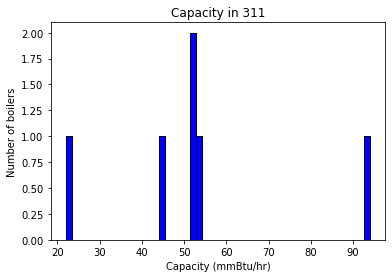

In [15]:
# matplotlib histogram
plt.hist(region_1_311['Input_Capacity'], color = 'blue', edgecolor = 'black',
         bins = int((max_value - min_value)/5))

# seaborn histogram
sns.distplot(region_1_311['Input_Capacity'], hist=True, kde=False, 
             bins=int((max_value - min_value)/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Capacity in 311')
plt.xlabel('Capacity (mmBtu/hr)')
plt.ylabel('Number of boilers')